In [69]:
## Import required libraries
import numpy as np
import pandas as pd
import pickle
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [70]:
## Import the training data
train_data = '/Users/milad/OneDrive - Dalhousie University/Titanic_Github/Titanic_Survival_prediction/train.csv'
df_train = pd.read_csv(train_data)
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
## Import the testing data
test_data = '/Users/milad/OneDrive - Dalhousie University/Titanic_Github/Titanic_Survival_prediction/test.csv'
df_test = pd.read_csv(test_data)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
##make a copy of the original data
df_train_or = df_train.copy()
df_test_or = df_test.copy()

# Data analysis

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [75]:
## Check the data type of each column
df_test.dtypes.to_frame().rename(columns={0:'data_type'})

,data_type
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [76]:
## Finding unique values in each column
for col in df_train:
    print("There are ", len(df_train[col].unique()), "unique values in ", col)

There are  891 unique values in  PassengerId
There are  2 unique values in  Survived
There are  3 unique values in  Pclass
There are  891 unique values in  Name
There are  2 unique values in  Sex
There are  89 unique values in  Age
There are  7 unique values in  SibSp
There are  7 unique values in  Parch
There are  681 unique values in  Ticket
There are  248 unique values in  Fare
There are  148 unique values in  Cabin
There are  4 unique values in  Embarked


In [77]:
print("The minimum age is : ", df_train['Age'].min(), "The maximum age is :", df_train['Age'].max())

The minimum age is :  0.42 The maximum age is : 80.0


In [78]:
## Describe the data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
## Find the number of Null values in each columns
df_train.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


There are a lot of null values in the **Age** and **Cabin** columns

## Correlation analysis and features selection

In [80]:
df_train.corrwith(df_train["Survived"]).to_frame().rename(columns = {0:'Survived'})

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


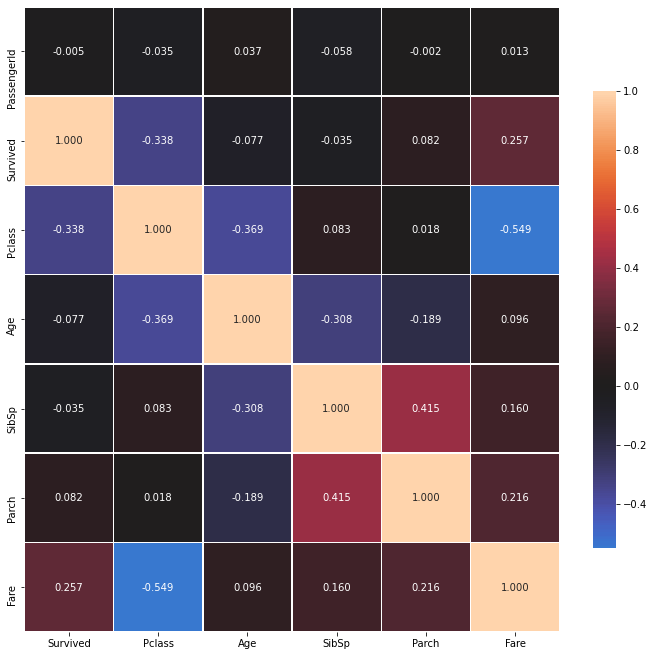

In [93]:
## Plotting correlation between different features

correlations = df_train.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlations[['Survived','Pclass','Age', 'SibSp', 'Parch','Fare']], vmax=1.0, center=0, fmt='.3f', 
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

**Survived** column has a higher correlation with **Pclass**, **Fare** and **Parch**.

There is not a significant correlation between any of the features.

Age has a really low correlation with the target!!(why)

In [94]:
## Skewness of the features

df_train.skew().to_frame().rename(columns={0:'Skewness'})

,Skewness
PassengerId,0.000000
Survived,0.478523
Pclass,-0.630548
Age,0.389108
SibSp,3.695352
Parch,2.749117
Fare,4.787317


**Fare** and **Parch** are highly positively skewed.